In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#age model
#model structure: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/age.prototxt
#pre-trained weights: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/dex_chalearn_iccv2015.caffemodel
age_model = cv2.dnn.readNetFromCaffe("age.prototxt.txt", "dex_chalearn_iccv2015.caffemodel")

In [3]:
#gender model
#model structure: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/gender.prototxt
#pre-trained weights: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/gender.caffemodel
gender_model = cv2.dnn.readNetFromCaffe("gender.prototxt.txt", "gender.caffemodel")

In [4]:
img = cv2.imread("MarcArias.jpg") #Importante que sea jpg

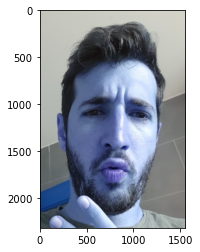

In [5]:
plt.imshow(img)

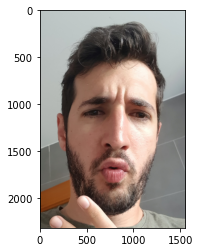

In [6]:
# Para que no se vea en escala de RGB
plt.imshow(img[:,:,::-1])

In [7]:
# Utilizamos el detector de caras del opencv
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [8]:
faces = detector.detectMultiScale(img, 1.5, 3) #Lo numeros se pueden modificar un poco no pasarse de 5
faces

array([[ 102,  541, 1384, 1384]], dtype=int32)

In [9]:
x, y, w, h = faces[0]
# Obtenemos la corenada de la cara detectada

In [10]:
detected_face = img[int(y):int(y+h), int(x):int(x+w)]

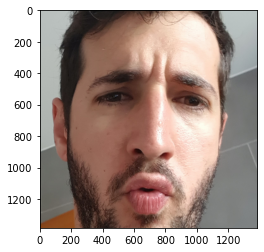

In [11]:
plt.imshow(detected_face[:,:,::-1])

In [12]:
detected_face = cv2.resize(detected_face, (224,224))
#La red neuronal de caffemodel que detecta la edad trabaja con imagnes del tamaño de 224x224. 

In [13]:
detected_face.shape

(224, 224, 3)

In [14]:
detected_face_blob = cv2.dnn.blobFromImage(detected_face)
# La forma de la imagen ha de ser (1, 3, 224, 224) por eso aplicamos la función blob

In [15]:
detected_face_blob.shape

(1, 3, 224, 224)

In [16]:
# Aplicamos la red neuronal de caffemodel
age_model.setInput(detected_face_blob)
age_result = age_model.forward()

gender_model.setInput(detected_face_blob)
gender_result = gender_model.forward()

In [17]:
gender_result
# En el array podemos observar que nos da 2 valores, la suma es 1. Si el primer valor esta cerca de 1 significa que 
# es mujer si el segundo valor esta más cerca de 1 es hombre.

array([[0.00184465, 0.9981553 ]], dtype=float32)

In [18]:
if np.argmax(gender_result[0]) == 0:
    print("Mujer")
else:
    print("Hombre")

Hombre


In [19]:
index = len(age_result[0])
index
# Observamos que tenemos un array de 101 valores. Cada valor se multiplica por el valor de su indice y se suma el total
# para averiguar la edad detecteda

101

In [20]:
indexes = np.array([i for i in range(0,index)])

In [21]:
aparent_age = round(np.sum(age_result[0]*indexes))
aparent_age
# Ahora obtenemos la edad estiamda de la red nueonal de caffemodel

27.0